In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz 
import itertools




In [2]:
df = pd.read_csv("METABRIC_RNA_Mutation(large).csv")

In [3]:
df.shape

(1904, 514)

In [ ]:
df.columns.tolist()

In [5]:
#supression des valeurs nulles
missing_values_count = df.isnull().sum()
missing_values_count[0:10]
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

#pourcentage de données manquantes
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

#pour supprimer lignes qui ont des valeurs NA
df_na=df.dropna()
df_na.shape

0.09002141712716215


(1227, 514)

In [167]:
#sélections des variables d'interêt

df_features = ["cancer_type_detailed", "cellularity", "tumor_stage", "tumor_size", "lymph_nodes_examined_positive"]
data=df[df_features].dropna()



#on supprime cette ligne car 1 seule valeur dans ce type de cancer
data.drop(data.loc[data['cancer_type_detailed']=='Metaplastic Breast Cancer'].index, inplace=True)
data.loc[data.cancer_type_detailed=="Metaplastic Breast Cancer"]

#on sépare le jeu de données en séparant la variable à expliquer et les variables explicatives
y = data.tumor_stage
X = data.drop(['tumor_stage'], axis=1)
print(set(y))

{0.0, 1.0, 2.0, 3.0, 4.0}


In [162]:
#on regarde la distribution par stage de tumeur
num_stage=dict()
for stage in y :
    if stage not in num_stage :
        num_stage[stage] = 1
    else :
        num_stage[stage]+=1
for num in num_stage :
    print(num, num_stage)

1.0 {1.0: 449, 2.0: 773, 4.0: 9, 3.0: 110, 0.0: 2}
2.0 {1.0: 449, 2.0: 773, 4.0: 9, 3.0: 110, 0.0: 2}
4.0 {1.0: 449, 2.0: 773, 4.0: 9, 3.0: 110, 0.0: 2}
3.0 {1.0: 449, 2.0: 773, 4.0: 9, 3.0: 110, 0.0: 2}
0.0 {1.0: 449, 2.0: 773, 4.0: 9, 3.0: 110, 0.0: 2}


/Users/hugo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


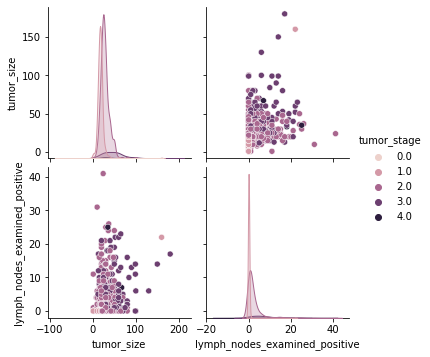

In [7]:
#visualisation des variables qualitatives par rapport à notre variable à expliquer
sns.pairplot(data=data, hue='tumor_stage')
plt.show()

In [172]:
# On divise nos jeux de données en jeu de données d'entraînement de test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state = 500)

In [173]:
# On met nos variables catégorielles au format one hot encoder
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['cancer_type_detailed', 'cellularity']),
    remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names())
X_train.columns


Index(['onehotencoder__x0_Breast',
       'onehotencoder__x0_Breast Invasive Ductal Carcinoma',
       'onehotencoder__x0_Breast Invasive Lobular Carcinoma',
       'onehotencoder__x0_Breast Invasive Mixed Mucinous Carcinoma',
       'onehotencoder__x0_Breast Mixed Ductal and Lobular Carcinoma',
       'onehotencoder__x1_High', 'onehotencoder__x1_Low',
       'onehotencoder__x1_Moderate', 'tumor_size',
       'lymph_nodes_examined_positive'],
      dtype='object')

In [174]:
# On fait de même pour le jeu de données test 
X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names())

In [236]:
# on définit notre arbre de décision
clf = DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=7, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
#affichage de l'arbre
tree.plot_tree(clf)

In [237]:
# On réalise les prédictions sur notre jeu de données test et on affiche les 10 premières
predictions = clf.predict(X_test)
print(predictions[:10])
print(list(y_test[:10]))

[1. 1. 2. 1. 3. 2. 1. 3. 1. 2.]
[1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 3.0, 1.0, 2.0]


In [238]:
# On mesure la précision de notre modèle
print(accuracy_score(y_test, predictions))

0.8684863523573201


In [189]:
#on regarde la distribution par stage de tumeur pour notre jeu de données test
num_stage=dict()
for stage in y_test :
    if stage not in num_stage :
        num_stage[stage] = 1
    else :
        num_stage[stage]+=1
for num in num_stage :
    print(num, num_stage)

1.0 {1.0: 133, 2.0: 233, 3.0: 35, 0.0: 1, 4.0: 1}
2.0 {1.0: 133, 2.0: 233, 3.0: 35, 0.0: 1, 4.0: 1}
3.0 {1.0: 133, 2.0: 233, 3.0: 35, 0.0: 1, 4.0: 1}
0.0 {1.0: 133, 2.0: 233, 3.0: 35, 0.0: 1, 4.0: 1}
4.0 {1.0: 133, 2.0: 233, 3.0: 35, 0.0: 1, 4.0: 1}


In [186]:
#création matrice de confusion
conf=confusion_matrix(y_test, predictions)

Normalized confusion matrix
[[0.         1.         0.         0.         0.        ]
 [0.         0.87218045 0.12781955 0.         0.        ]
 [0.         0.02145923 0.93991416 0.03862661 0.        ]
 [0.         0.         0.54285714 0.45714286 0.        ]
 [0.         1.         0.         0.         0.        ]]


<Figure size 432x288 with 0 Axes>

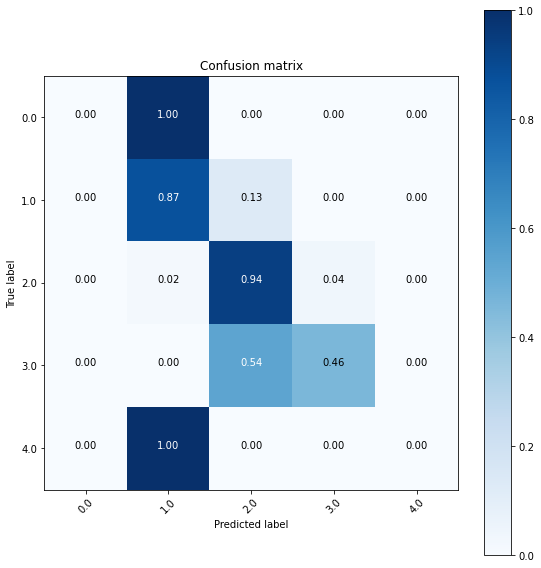

In [232]:
#plot de la matrice de confusion
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(conf, classes=set(y_test),
                      title='Confusion matrix')

#si on veut l'enregistrer :
#plt.savefig('confusion_matrice')

In [231]:
dot_data = tree.export_graphviz(clf, out_file=None, 
feature_names=X_train.columns,
class_names=["0","1","2","3","4"],    
filled=True, rounded=True,  
special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
#graph.render("tumor_stage") 


'tumor_stage.pdf'